In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *
from src.samplers import *
from src.metrics import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

torch module path: /home/jonasm/.venv/lib/python3.10/site-packages/torch/__init__.py
torch module dir: ['AVG', 'AcceleratorError', 'AggregationType', 'AliasDb', 'AnyType', 'Argument', 'ArgumentSpec', 'AwaitType', 'BFloat16Storage', 'BFloat16Tensor', 'BenchmarkConfig', 'BenchmarkExecutionStats', 'Block', 'BoolStorage', 'BoolTensor', 'BoolType', 'BufferDict', 'ByteStorage', 'ByteTensor', 'CallStack', 'Capsule', 'CharStorage', 'CharTensor', 'ClassType', 'Code', 'CompilationUnit', 'CompleteArgumentSpec', 'ComplexDoubleStorage', 'ComplexFloatStorage', 'ComplexType', 'ConcreteModuleType', 'ConcreteModuleTypeBuilder', 'DeepCopyMemoTable', 'DeserializationStorageContext', 'DeviceObjType', 'DictType', 'DisableTorchFunction', 'DisableTorchFunctionSubclass', 'DispatchKey', 'DispatchKeySet', 'DoubleStorage', 'DoubleTensor', 'EnumType', 'ErrorReport', 'Event', 'ExcludeDispatchKeyGuard', 'ExecutionPlan', 'FatalError', 'FileCheck', 'FloatStorage', 'FloatTensor', 'FloatType', 'FunctionSchema', 'Future

In [2]:
GaussianMix = GaussianMixture.symmetric_2D(4,1.0)

gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, output_dim=1, hidden_dims=[64,64,64,64])

trainer = FlowDiffTrainer(path=gaussian_path, modeltype="density", model=model1)

trainer.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 47.05155563354492
In Epoch 1000 we have a loss of 6.744901657104492
In Epoch 1000 we have a loss of 6.744901657104492
In Epoch 2000 we have a loss of 4.0799665451049805
In Epoch 2000 we have a loss of 4.0799665451049805
In Epoch 3000 we have a loss of 74.63115692138672
In Epoch 3000 we have a loss of 74.63115692138672
In Epoch 4000 we have a loss of 9.153735160827637
In Epoch 4000 we have a loss of 9.153735160827637
In Epoch 5000 we have a loss of 5.136751174926758
In Epoch 5000 we have a loss of 5.136751174926758
In Epoch 6000 we have a loss of 9.325207710266113
In Epoch 6000 we have a loss of 9.325207710266113
In Epoch 7000 we have a loss of 6.529362678527832
In Epoch 7000 we have a loss of 6.529362678527832
In Epoch 8000 we have a loss of 9.460314750671387
In Epoch 8000 we have a loss of 9.460314750671387
In Epoch 9000 we have a loss of 4.673725605010986
In Epoch 9000 we have a loss of 4.673725605010986
In Epoch 10000 we have a loss of 6.85969877243042
I

In [3]:
rec1 = Rectangle(device=device, coords= [(-5.0,5.0),(-10,10)])

gaussian_path2 = GaussianConditionalProbabilityPath(p_data=rec1, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model2 = BasicMLP(input_dim=2, output_dim= 1, hidden_dims=[64,64,64,64])

trainer2 = FlowDiffTrainer(path=gaussian_path2, modeltype="density", model=model2)

trainer2.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 18.731470108032227
In Epoch 1000 we have a loss of 5.81122350692749
In Epoch 1000 we have a loss of 5.81122350692749
In Epoch 2000 we have a loss of 9.093445777893066
In Epoch 2000 we have a loss of 9.093445777893066
In Epoch 3000 we have a loss of 15.130454063415527
In Epoch 3000 we have a loss of 15.130454063415527
In Epoch 4000 we have a loss of 9.939281463623047
In Epoch 4000 we have a loss of 9.939281463623047
In Epoch 5000 we have a loss of 13.233162879943848
In Epoch 5000 we have a loss of 13.233162879943848
In Epoch 6000 we have a loss of 5.450856685638428
In Epoch 6000 we have a loss of 5.450856685638428
In Epoch 7000 we have a loss of 6.436261177062988
In Epoch 7000 we have a loss of 6.436261177062988
In Epoch 8000 we have a loss of 7.1424455642700195
In Epoch 8000 we have a loss of 7.1424455642700195
In Epoch 9000 we have a loss of 5.65491247177124
In Epoch 9000 we have a loss of 5.65491247177124
In Epoch 10000 we have a loss of 6.439992427825928

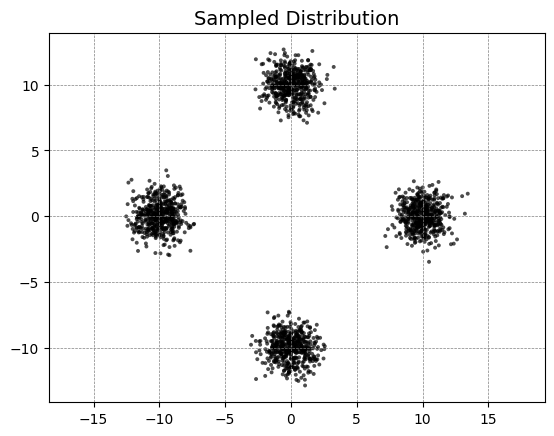

In [4]:
plot_samples(GaussianMix.sample(2000))
plt.show()

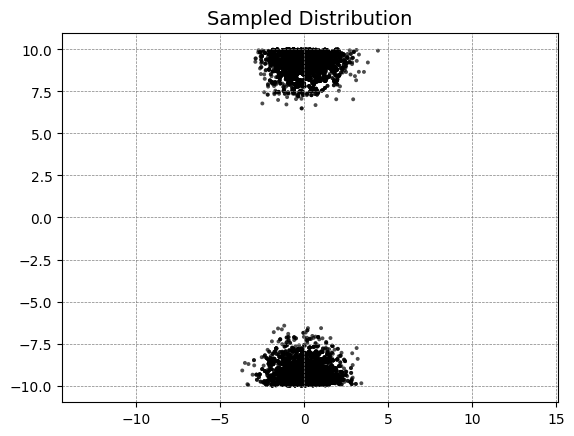

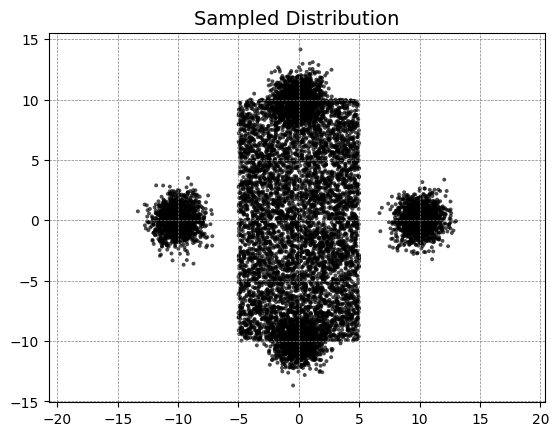

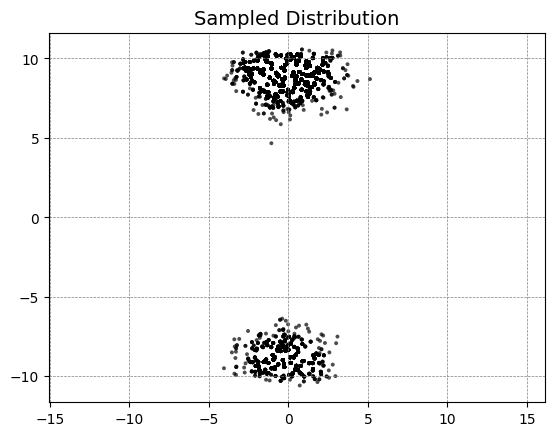

In [5]:
#samples = sample_UnionLangevin(models = [model1,model2], n= 2000, path = gaussian_path, device="cuda")
#plot_samples(samples, contour=False, scatter=True)

#sample = DensityCompSample(models = [model1,model2], n= 2000, path = gaussian_path, proposal_density = model1, n_importance=2000, device="cuda")
prod = ProductLogSample(densities=[GaussianMix, rec1], proposal_density=UnionLogSample(densities=[GaussianMix, rec1]))
union = UnionLogSample(densities=[GaussianMix, rec1])

plot_samples(prod.sample(11000))
plt.show()
plot_samples(union.sample(11000))
plt.show()
rec2 = Rectangle(device=device, coords= [(-15.0,15.0),(-15,15)])

sam, Z, w, ess = DensityCompSampleNormalized(models = [model1,model2], proposal=rec2, n= 11000, path = gaussian_path, n_importance = 11000, device="cuda", true_density=True, t_final=0.99)
plot_samples(sam, contour=False, scatter=True)
#plot_samples(sample_CompLangevin(models = [model1,model2], n= 2000, path = gaussian_path, device="cuda"))

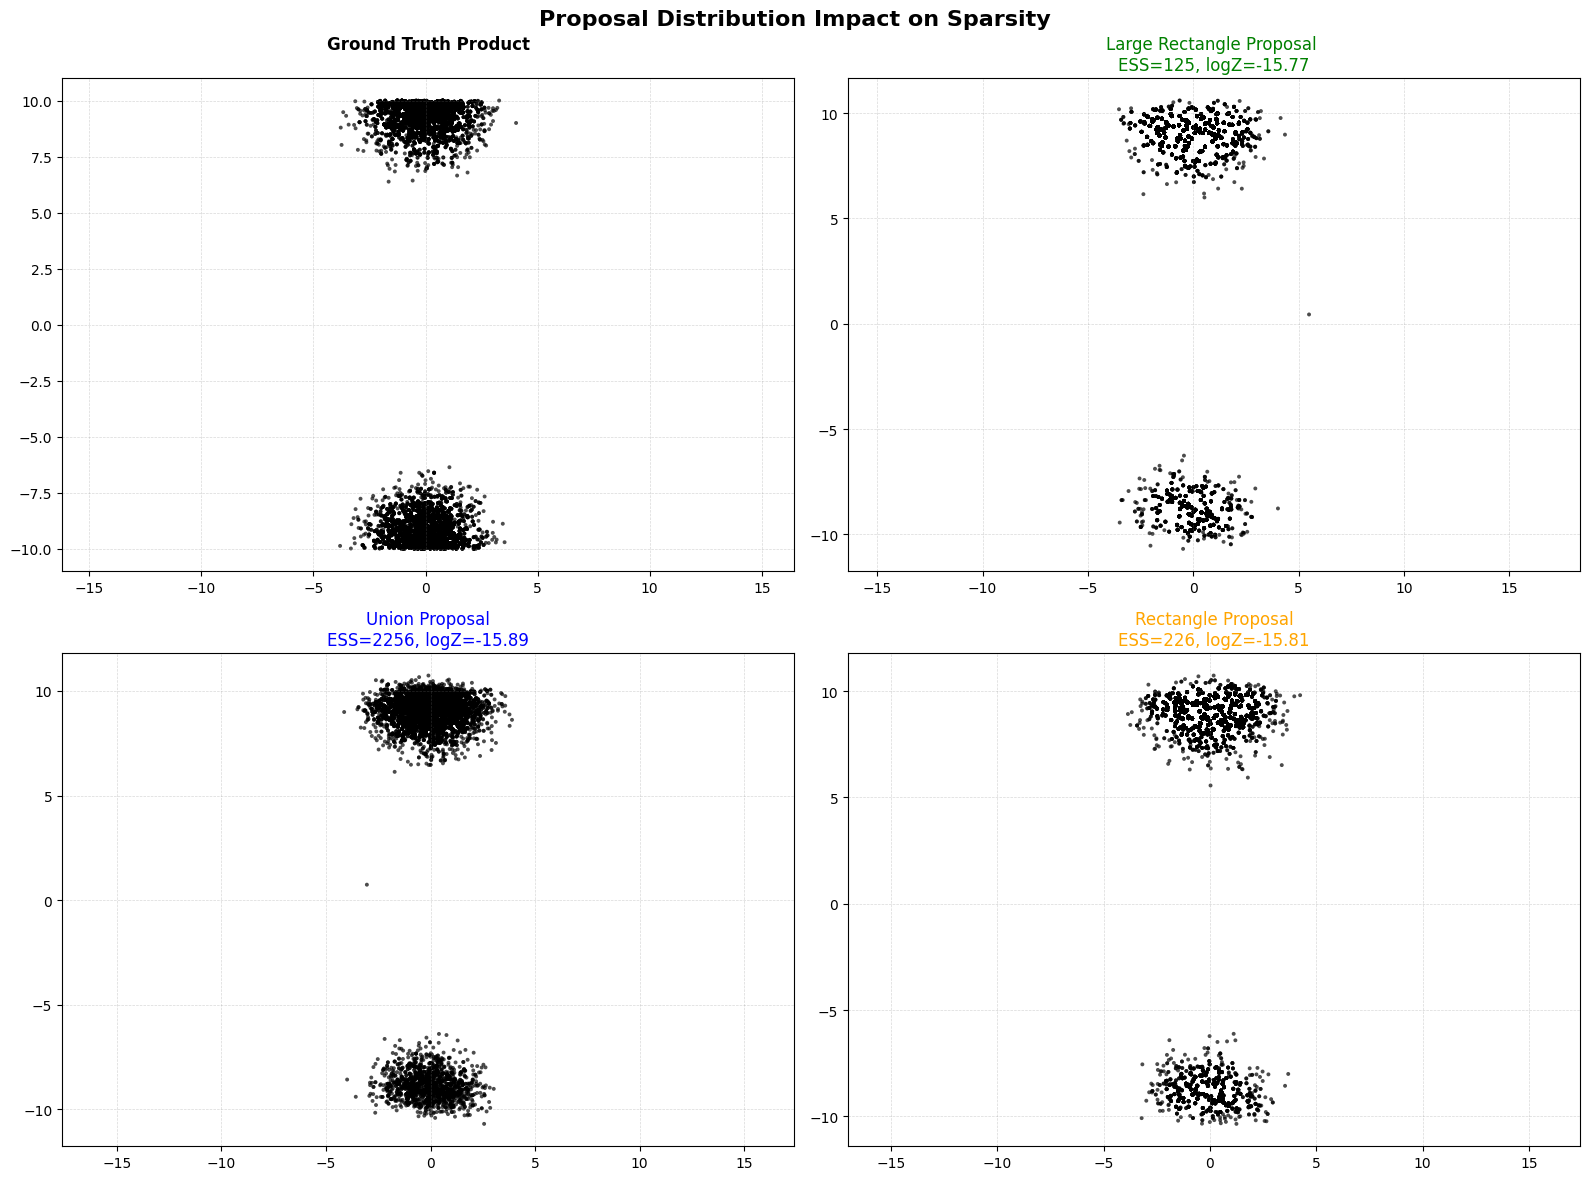

Gaussian proposal - ESS: 125, logZ: -15.77
Union proposal    - ESS: 2256, logZ: -15.89
Rectangle proposal- ESS: 226, logZ: -15.81


In [6]:
rec3 = Rectangle(device=device, coords= [(-20.0,20.0),(-20,20)])

sam_gaussian, Z_gaussian, w_gaussian, ess_gaussian = DensityCompSampleNormalized(
    models=[model1, model2], 
    proposal=rec3, 
    n=11000, 
    path=gaussian_path, 
    n_importance=20000,  
    device="cuda", 
    true_density=True, 
    t_final=0.99
)

union_proposal = UnionLogSample(densities=[GaussianMix, rec1])
sam_union, Z_union, w_union, ess_union = DensityCompSampleNormalized(
    models=[model1, model2], 
    proposal=union_proposal, 
    n=11000, 
    path=gaussian_path, 
    n_importance=20000,
    device="cuda", 
    true_density=True, 
    t_final=0.99
)

sam_rect, Z_rect, w_rect, ess_rect = DensityCompSampleNormalized(
    models=[model1, model2], 
    proposal=rec2, 
    n=11000, 
    path=gaussian_path, 
    n_importance=20000,  # More importance samples
    device="cuda", 
    true_density=True, 
    t_final=0.99
)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

plot_samples(prod.sample(11000), ax=axes[0,0], contour=False, scatter=True)
axes[0,0].set_title("Ground Truth Product\n", fontsize=12, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

plot_samples(sam_gaussian, ax=axes[0,1], contour=False, scatter=True)
axes[0,1].set_title(f"Large Rectangle Proposal \nESS={ess_gaussian:.0f}, logZ={Z_gaussian:.2f}", fontsize=12, color='green')
axes[0,1].grid(True, alpha=0.3)

plot_samples(sam_union, ax=axes[1,0], contour=False, scatter=True)
axes[1,0].set_title(f"Union Proposal\nESS={ess_union:.0f}, logZ={Z_union:.2f}", fontsize=12, color='blue')
axes[1,0].grid(True, alpha=0.3)

plot_samples(sam_rect, ax=axes[1,1], contour=False, scatter=True)
axes[1,1].set_title(f"Rectangle Proposal\nESS={ess_rect:.0f}, logZ={Z_rect:.2f}", fontsize=12, color='orange')
axes[1,1].grid(True, alpha=0.3)

plt.suptitle("Proposal Distribution Impact on Sparsity", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Gaussian proposal - ESS: {ess_gaussian:.0f}, logZ: {Z_gaussian:.2f}")
print(f"Union proposal    - ESS: {ess_union:.0f}, logZ: {Z_union:.2f}")  
print(f"Rectangle proposal- ESS: {ess_rect:.0f}, logZ: {Z_rect:.2f}")

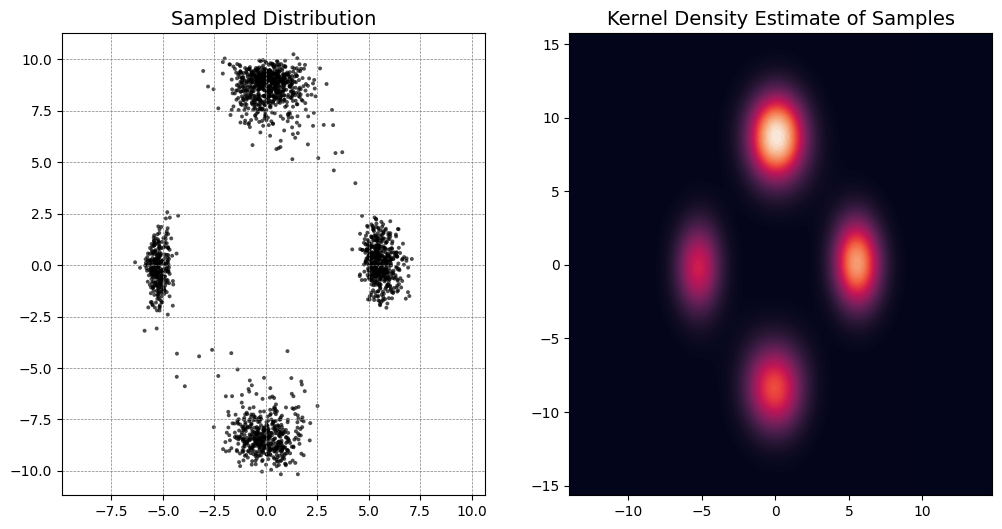

In [7]:
models = [model1,model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta(), density=True)

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 
samples = comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps)
figsize=(12, 6)

fig, axes = plt.subplots(1, 2, figsize = figsize)
plot_samples(samples, ax=axes[0], kde=True)
plot_kde(samples, ax = axes[1], cmap="rocket")

plt.show()

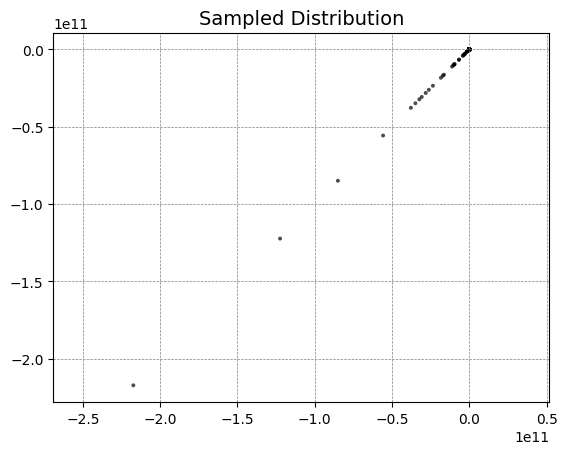

In [8]:
models = [model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.05, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)

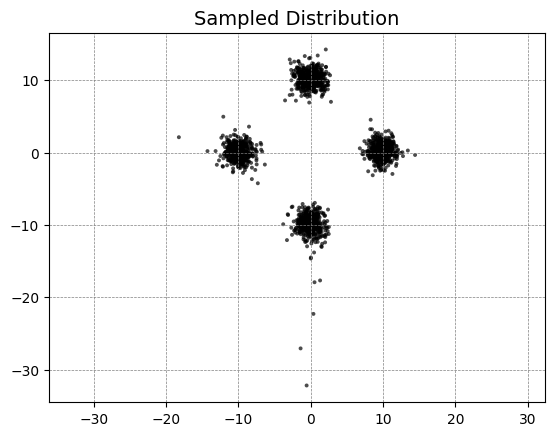

In [9]:
models = [model1]

sde = CompLangevin(models=models, sigma = 1, density = True, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 


plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps), contour=False, scatter=True)

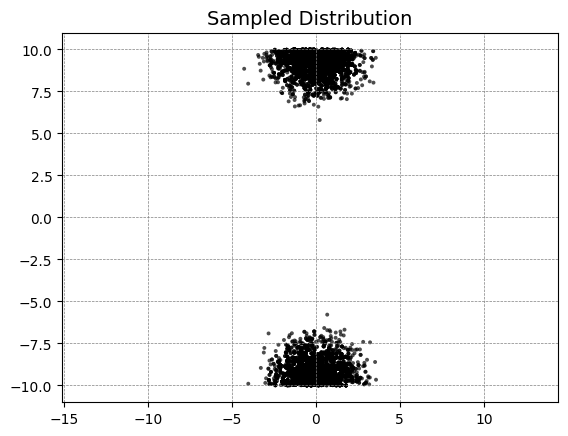

In [10]:
prod = ProductLogSample(densities=[GaussianMix, rec1], proposal_density=UnionLogSample(densities=[GaussianMix, rec1]))

plot_samples(prod.sample(11000))

In [11]:
#TODO: importance sampling for models, i.e. using one of the models as proposal (or something else? Maybe addition of scores or something in SDE) then standard IS
#TODO: DO Annealed for models 
#TODO: Metrics
#TODO: MORE EXAMPLES; TABELLE

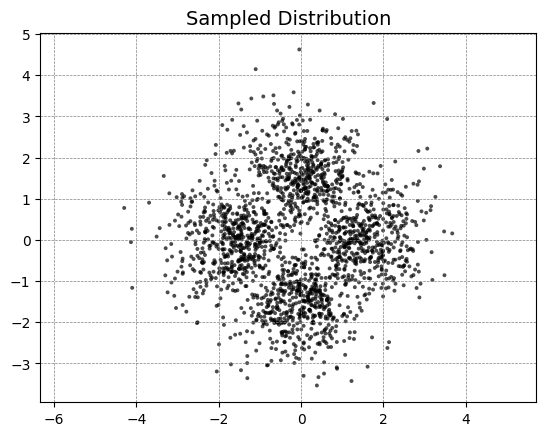

In [12]:
GaussianMix = GaussianMixture.symmetric_2D(4,1.0)
rec1 = Rectangle(device=device, coords= [(-5.0,5.0),(-10,10)])
gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)


sde = AnnealedProduct(densities=[GaussianMix], proposal_density=UnionLogSample(densities=[GaussianMix, rec1]), alpha=CosineAlpha(), sigma=0.5)

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.1, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) # [batch_size, num_steps, 1]

plot_samples(comp_sampler.sample_with_traj(gaussian_path.p_init.sample(2000), steps)[-1])

=== Testing New AIS Compositional Methods ===
1. Testing AnnealedImportanceSampling...


/home/jonasm/Compostional-Generative-Models/src/comp_models.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = x + drift * abs(dt) + diffusion * torch.sqrt(torch.tensor(abs(dt))) * noise


2. Testing EnergyBasedComposition...


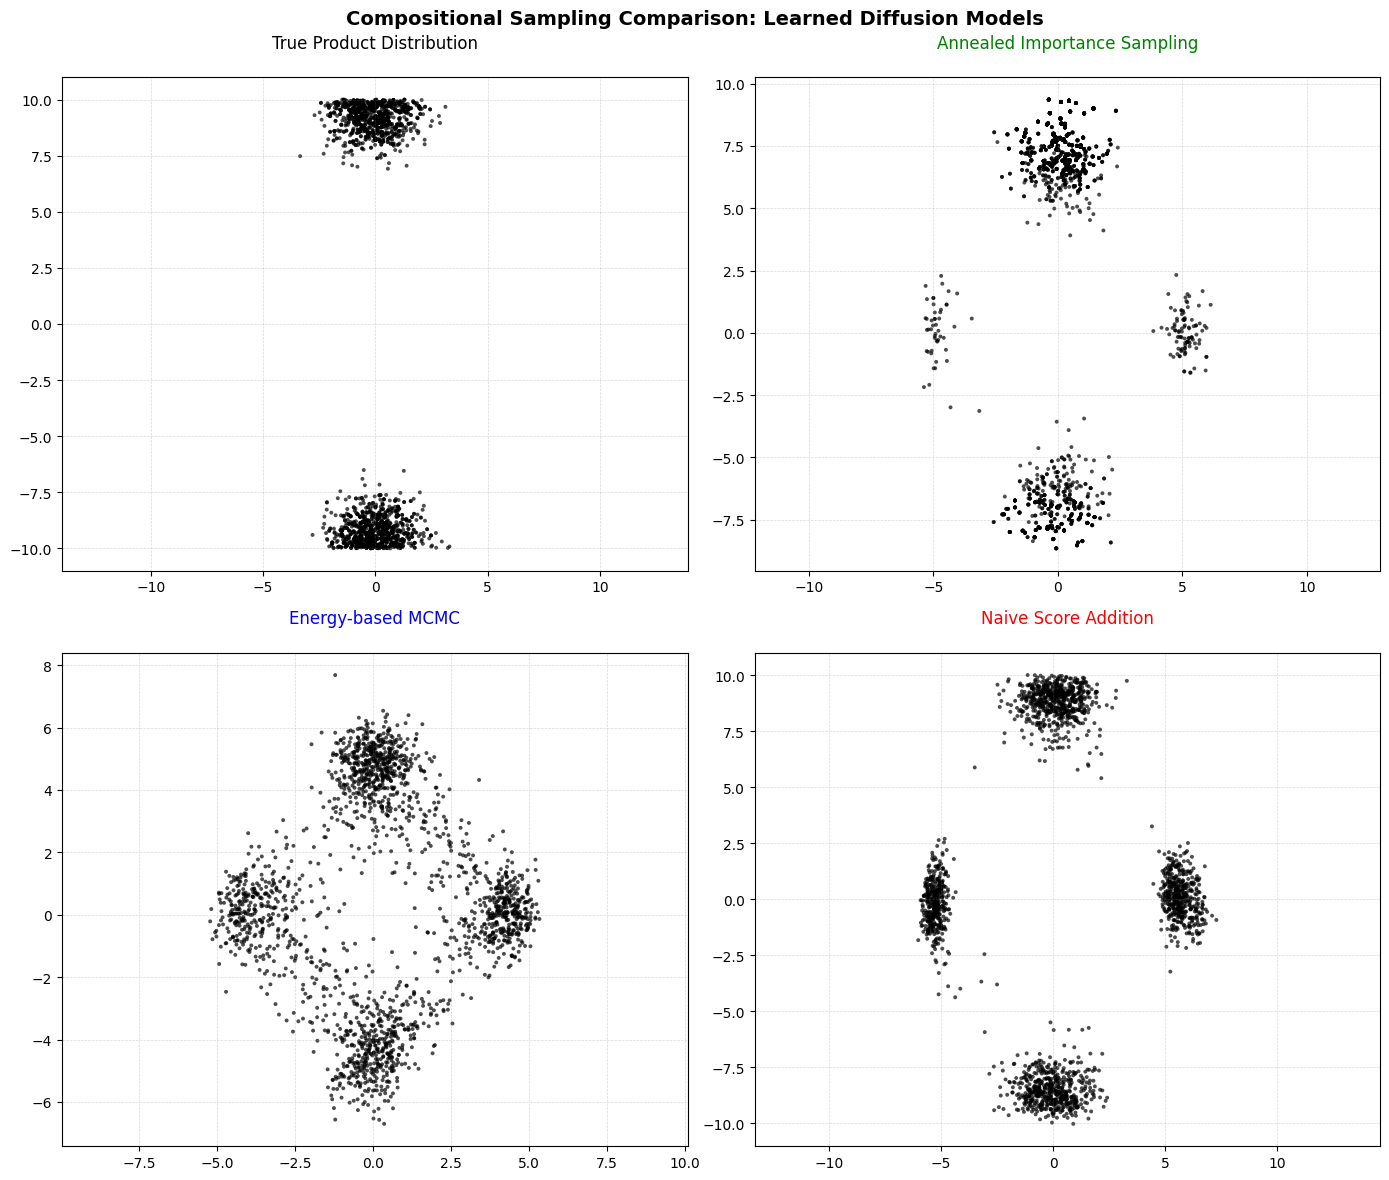

In [13]:
# Test the new Annealed Importance Sampling methods
print("=== Testing New AIS Compositional Methods ===")

# Method 1: Annealed Importance Sampling (Recommended)
print("1. Testing AnnealedImportanceSampling...")
ais_samples = sample_ProductAIS(models=[model1, model2], n=2000, path=gaussian_path, device="cuda")

# Method 2: Energy-based MCMC (Alternative)  
print("2. Testing EnergyBasedComposition...")
mcmc_samples = sample_ProductMCMC(models=[model1, model2], n=2000, path=gaussian_path, device="cuda")

# Compare with true product and naive methods
true_prod = ProductLogSample(densities=[GaussianMix, rec1], proposal_density=UnionLogSample(densities=[GaussianMix, rec1]))
true_samples = true_prod.sample(2000)

naive_samples = sample_CompLangevin(models=[model1, model2], n=2000, path=gaussian_path, device="cuda", density=True)

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# True product (reference)
plot_samples(true_samples, ax=axes[0,0], contour=False, scatter=True)
axes[0,0].set_title("True Product Distribution\n", fontsize=12)
axes[0,0].grid(True, alpha=0.3)

# AIS result
plot_samples(ais_samples, ax=axes[0,1], contour=False, scatter=True)
axes[0,1].set_title("Annealed Importance Sampling\n", fontsize=12, color='green')
axes[0,1].grid(True, alpha=0.3)

# MCMC result
plot_samples(mcmc_samples, ax=axes[1,0], contour=False, scatter=True)
axes[1,0].set_title("Energy-based MCMC\n", fontsize=12, color='blue')
axes[1,0].grid(True, alpha=0.3)

# Naive score addition (for comparison)
plot_samples(naive_samples, ax=axes[1,1], contour=False, scatter=True)
axes[1,1].set_title("Naive Score Addition\n", fontsize=12, color='red')
axes[1,1].grid(True, alpha=0.3)

plt.suptitle("Compositional Sampling Comparison: Learned Diffusion Models", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

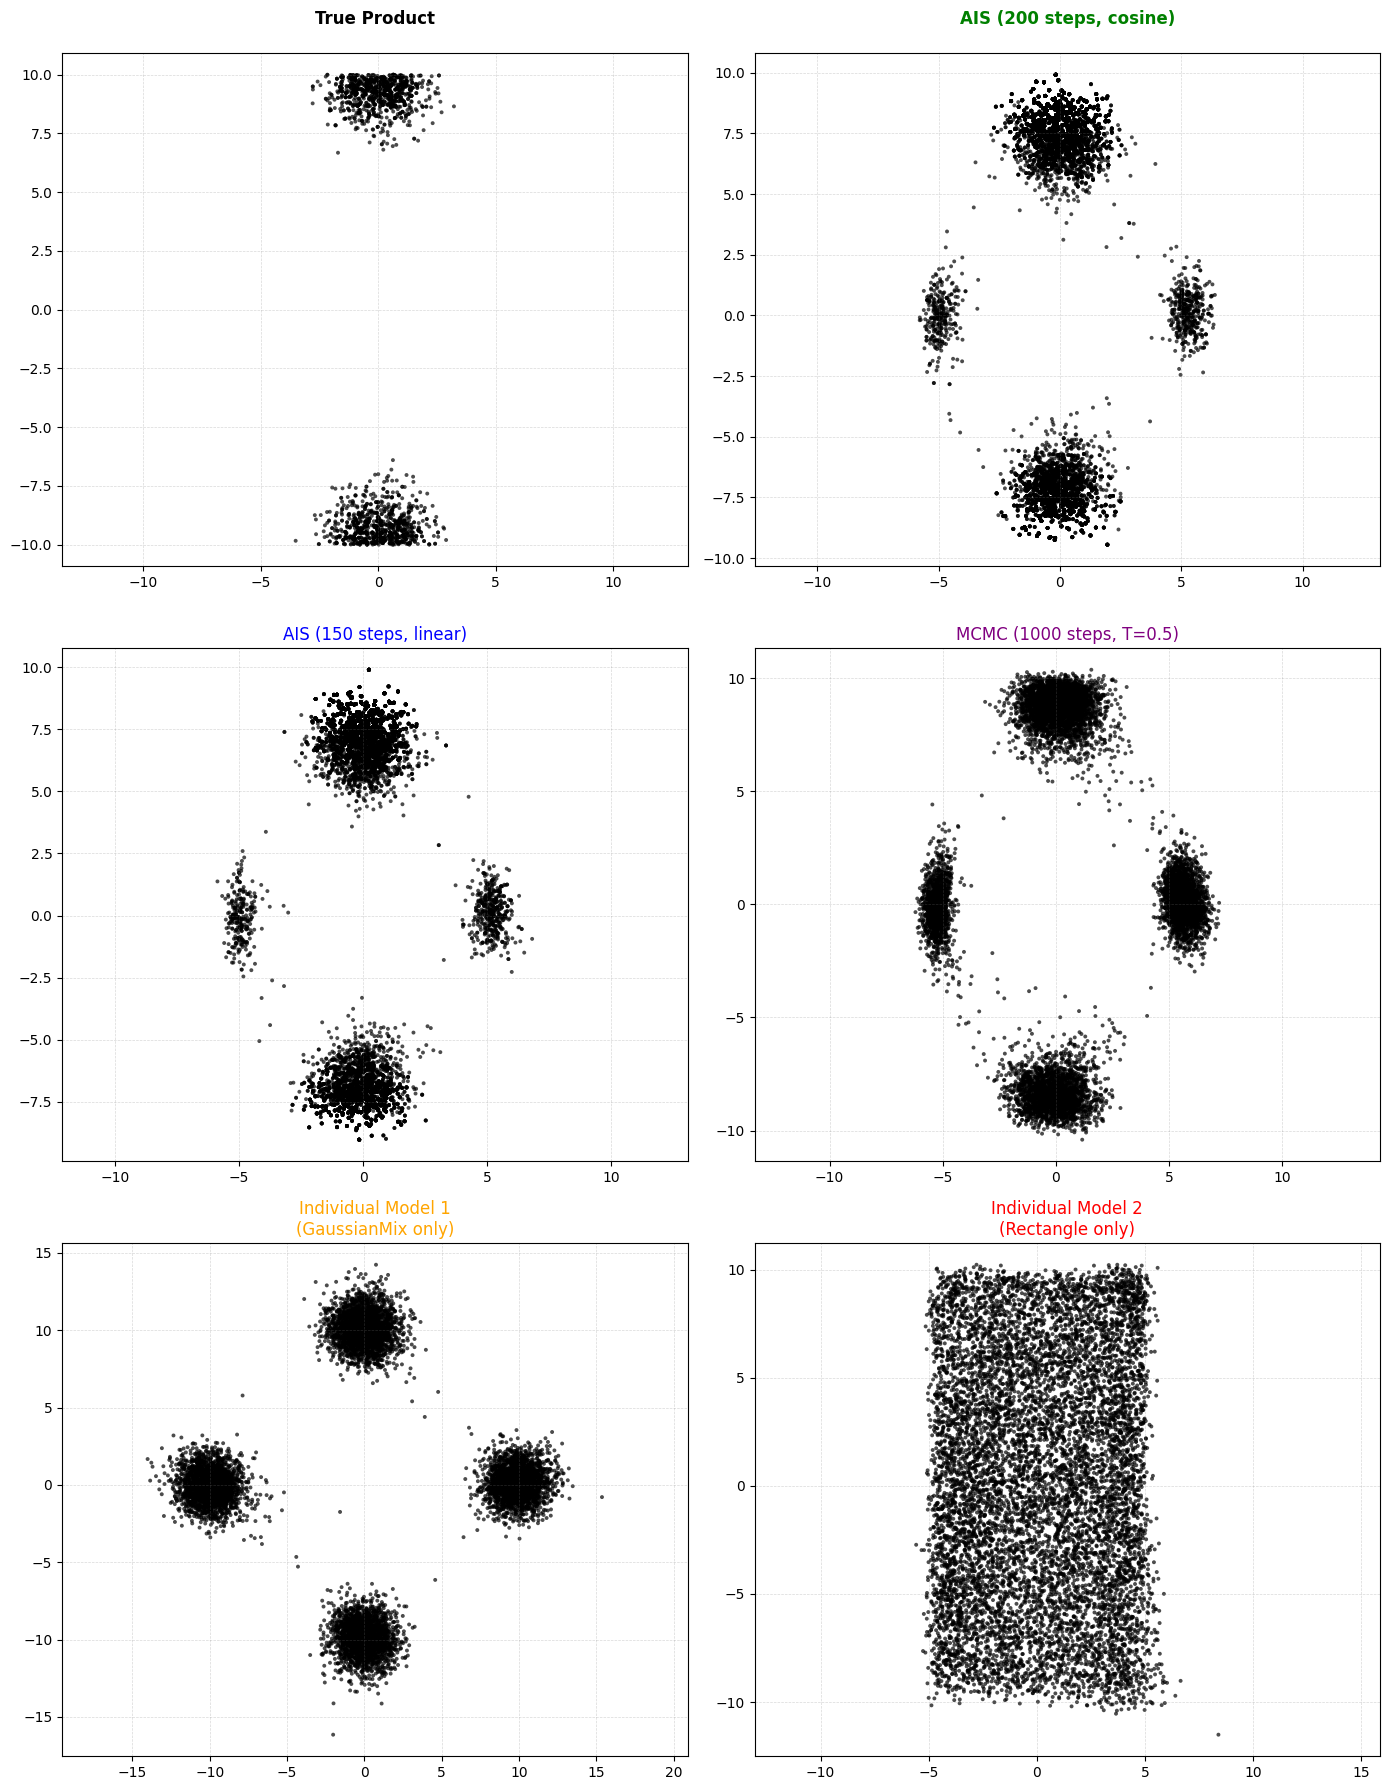

In [18]:

# Method 1: More annealing steps
ais_samples_fine = AnnealedImportanceSampling(
    models=[model1, model2], 
    n=10000, 
    path=gaussian_path, 
    n_steps=200,  # More steps
    device="cuda", 
    density=True, 
    beta_schedule="cosine"  # Cosine might work better
)

# Method 2: Different annealing schedule
ais_samples_linear = AnnealedImportanceSampling(
    models=[model1, model2], 
    n=10000, 
    path=gaussian_path, 
    n_steps=150, 
    device="cuda", 
    density=True, 
    beta_schedule="linear"
)

# Method 3: Improved MCMC with more steps
mcmc_samples_fine = EnergyBasedComposition(
    models=[model1, model2],
    n=10000,
    path=gaussian_path,
    device="cuda",
    density=True,
    mcmc_steps=1000,  # More MCMC steps
    step_size=0.005,  # Smaller steps
    temperature=0.5   # Lower temperature
)

# Reference distributions
true_prod = ProductLogSample(densities=[GaussianMix, rec1], proposal_density=UnionLogSample(densities=[GaussianMix, rec1]))
true_samples = true_prod.sample(2000)

# Test individual models to see if they work correctly
individual_model1 = sample_CompLangevin(models=[model1], n=10000, path=gaussian_path, device="cuda", density=True)
individual_model2 = sample_CompLangevin(models=[model2], n=10000, path=gaussian_path2, device="cuda", density=True) 

# Create comprehensive comparison
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Row 1: True vs best AIS
plot_samples(true_samples, ax=axes[0,0], contour=False, scatter=True)
axes[0,0].set_title("True Product\n", fontsize=12, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

plot_samples(ais_samples_fine, ax=axes[0,1], contour=False, scatter=True)
axes[0,1].set_title("AIS (200 steps, cosine)\n", fontsize=12, color='green', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Row 2: Different AIS variants
plot_samples(ais_samples_linear, ax=axes[1,0], contour=False, scatter=True)
axes[1,0].set_title("AIS (150 steps, linear)", fontsize=12, color='blue')
axes[1,0].grid(True, alpha=0.3)

plot_samples(mcmc_samples_fine, ax=axes[1,1], contour=False, scatter=True)
axes[1,1].set_title("MCMC (1000 steps, T=0.5)", fontsize=12, color='purple')
axes[1,1].grid(True, alpha=0.3)

# Row 3: Individual models (for debugging)
plot_samples(individual_model1, ax=axes[2,0], contour=False, scatter=True)
axes[2,0].set_title("Individual Model 1\n(GaussianMix only)", fontsize=12, color='orange')
axes[2,0].grid(True, alpha=0.3)

plot_samples(individual_model2, ax=axes[2,1], contour=False, scatter=True)
axes[2,1].set_title("Individual Model 2\n(Rectangle only)", fontsize=12, color='red')
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Generating 1000 samples from model 1...
Generating 1000 samples from model 2...
Generating 1000 samples from model 2...
Finding intersections with ball radius = 0.3...
Successfully found 173 intersection samples!
Generating 1000 samples from model 1...
Finding intersections with ball radius = 0.3...
Successfully found 173 intersection samples!
Generating 1000 samples from model 1...
Generating 1000 samples from model 2...
Generating 1000 samples from model 2...
Finding intersections with ball radius = 0.8...
Successfully found 324 intersection samples!
Generating 1000 samples from model 1...
Finding intersections with ball radius = 0.8...
Successfully found 324 intersection samples!
Generating 1000 samples from model 1...
Generating 1000 samples from model 2...
Generating 1000 samples from model 2...
Finding intersections with ball radius = 1.5...
Successfully found 421 intersection samples!
Finding intersections with ball radius = 1.5...
Successfully found 421 intersection samples!


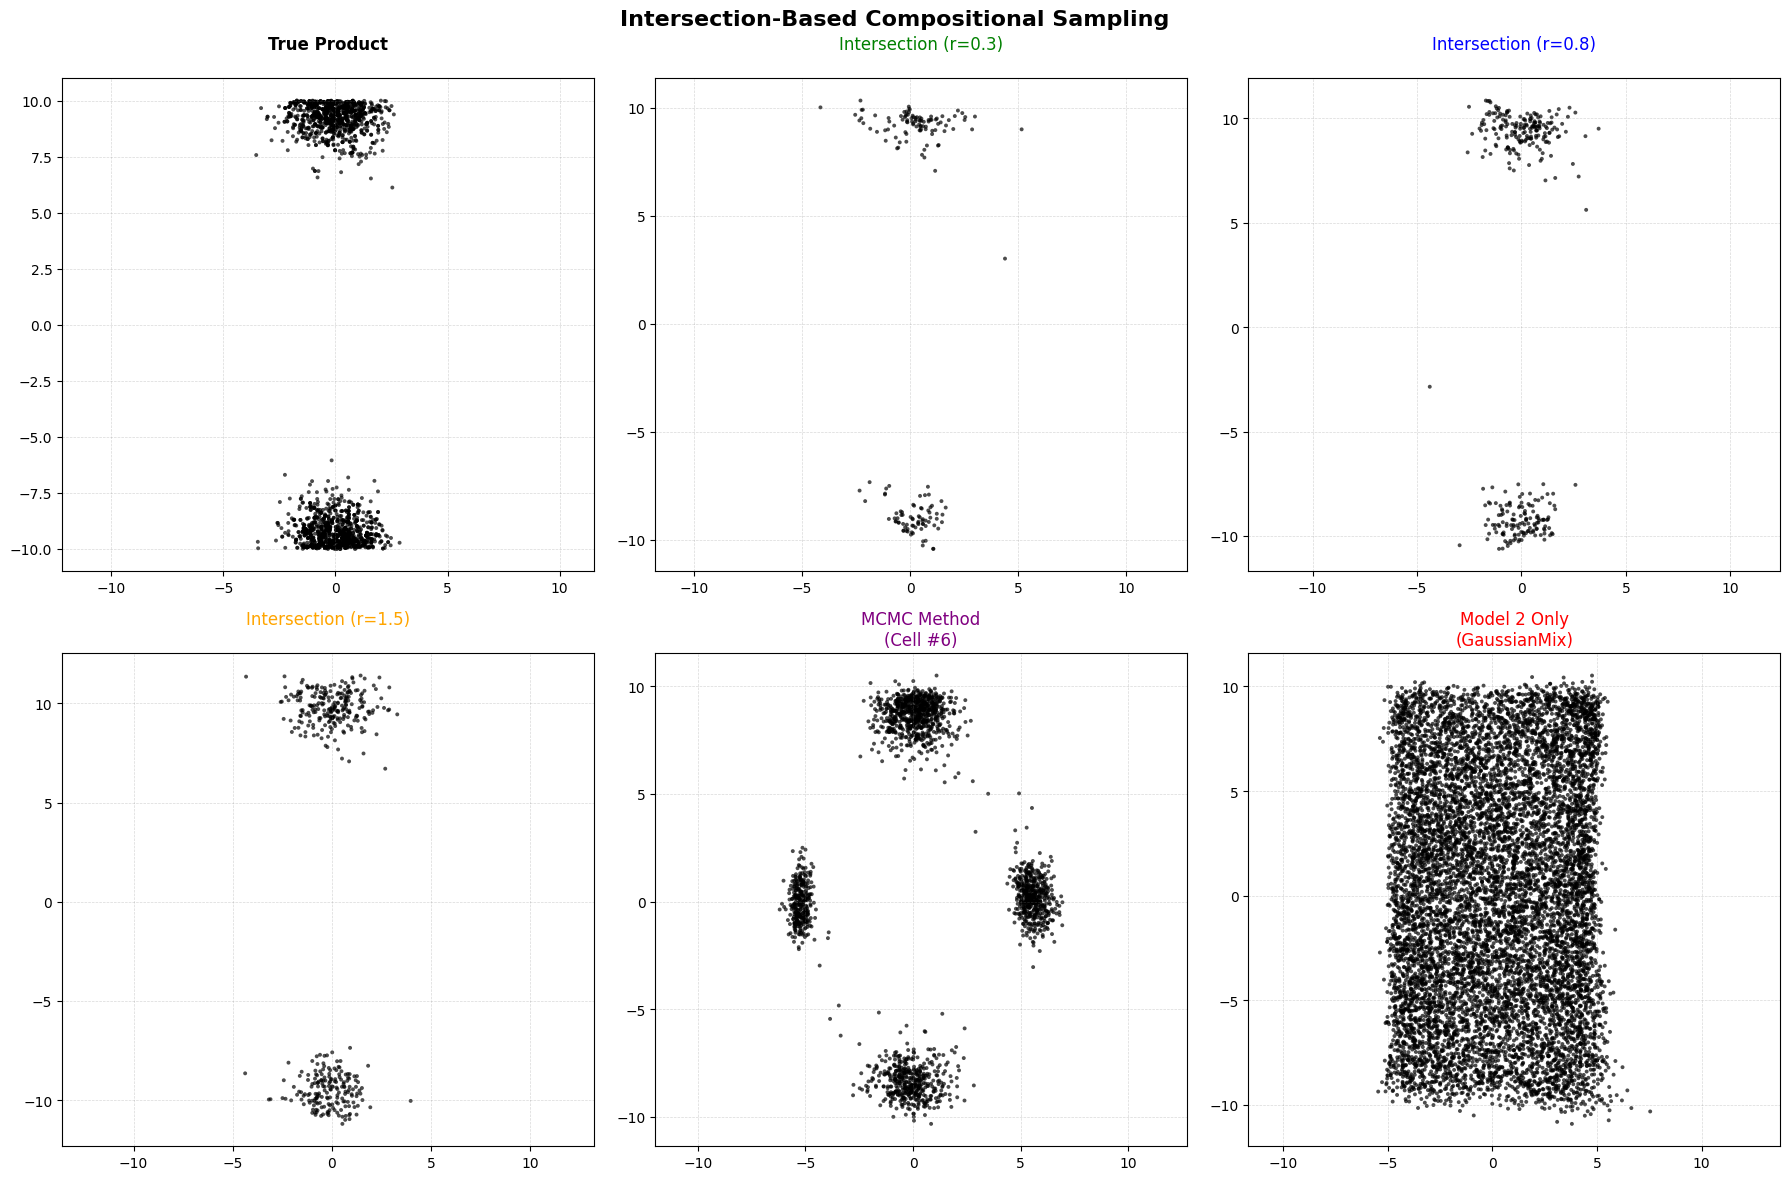

True product mean: [-0.01264253 -0.25969046]
Intersection (r=0.3) mean: [0.23543283 1.3019556 ]
Intersection (r=0.8) mean: [0.01962466 1.6920068 ]
Intersection (r=1.5) mean: [-0.03998053  1.3937052 ]
Working MCMC mean: [0.58945847 1.3344728 ]
Intersection (r=0.3): 173 samples
Intersection (r=0.8): 324 samples
Intersection (r=1.5): 421 samples


In [15]:

models = [model1,model2]
sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta(), density=True)
comp_solver = EulerSDESolver(sde)
comp_sampler = Sampler(comp_solver)
steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 
working_samples = comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps)

intersection_samples_small = IntersectionSampling(
    models=[model1, model2], 
    n_samples_per_model=1000, 
    path=gaussian_path, 
    device="cuda",
    ball_radius=0.3)

intersection_samples_medium = IntersectionSampling(
    models=[model1, model2], 
    n_samples_per_model=1000, 
    path=gaussian_path, 
    device="cuda",
    ball_radius=0.8)

intersection_samples_large = IntersectionSampling(
    models=[model1, model2], 
    n_samples_per_model=1000, 
    path=gaussian_path, 
    device="cuda",
    ball_radius=1.5)

# Compare with other methods
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: True product vs intersection methods
plot_samples(true_samples, ax=axes[0,0], contour=False, scatter=True)
axes[0,0].set_title("True Product\n", fontsize=12, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

plot_samples(intersection_samples_small, ax=axes[0,1], contour=False, scatter=True)
axes[0,1].set_title("Intersection (r=0.3)\n", fontsize=12, color='green')
axes[0,1].grid(True, alpha=0.3)

plot_samples(intersection_samples_medium, ax=axes[0,2], contour=False, scatter=True)
axes[0,2].set_title("Intersection (r=0.8)\n", fontsize=12, color='blue')
axes[0,2].grid(True, alpha=0.3)

# Row 2: Large radius vs other methods
plot_samples(intersection_samples_large, ax=axes[1,0], contour=False, scatter=True)
axes[1,0].set_title("Intersection (r=1.5)\n", fontsize=12, color='orange')
axes[1,0].grid(True, alpha=0.3)

# Compare with working MCMC method
plot_samples(working_samples, ax=axes[1,1], contour=False, scatter=True)
axes[1,1].set_title("MCMC Method\n(Cell #6)", fontsize=12, color='purple')
axes[1,1].grid(True, alpha=0.3)

# Individual models for reference
plot_samples(individual_model2, ax=axes[1,2], contour=False, scatter=True)
axes[1,2].set_title("Model 2 Only\n(GaussianMix)", fontsize=12, color='red')
axes[1,2].grid(True, alpha=0.3)

plt.suptitle("Intersection-Based Compositional Sampling", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


print(f"True product mean: {true_samples.mean(0).cpu().numpy()}")
print(f"Intersection (r=0.3) mean: {intersection_samples_small.mean(0).cpu().numpy()}")
print(f"Intersection (r=0.8) mean: {intersection_samples_medium.mean(0).cpu().numpy()}")
print(f"Intersection (r=1.5) mean: {intersection_samples_large.mean(0).cpu().numpy()}")
print(f"Working MCMC mean: {working_samples.mean(0).cpu().numpy()}")

print(f"Intersection (r=0.3): {intersection_samples_small.shape[0]} samples")
print(f"Intersection (r=0.8): {intersection_samples_medium.shape[0]} samples") 
print(f"Intersection (r=1.5): {intersection_samples_large.shape[0]} samples")

=== Comparing Both Intersection Sampling Methods ===
Generating 50000 samples from model 1...


Generating 50000 samples from model 2...
Finding intersections with ball radius = 0.8...
Successfully found 300 intersection samples!
Generating 15000 samples from model 1...
Finding intersections with ball radius = 0.8...
Successfully found 300 intersection samples!
Generating 15000 samples from model 1...
Generating 15000 samples from model 2...
Generating 15000 samples from model 2...
Finding intersections with ball radius = 0.8...
Successfully generated exactly 5000 intersection samples!
Finding intersections with ball radius = 0.8...
Successfully generated exactly 5000 intersection samples!


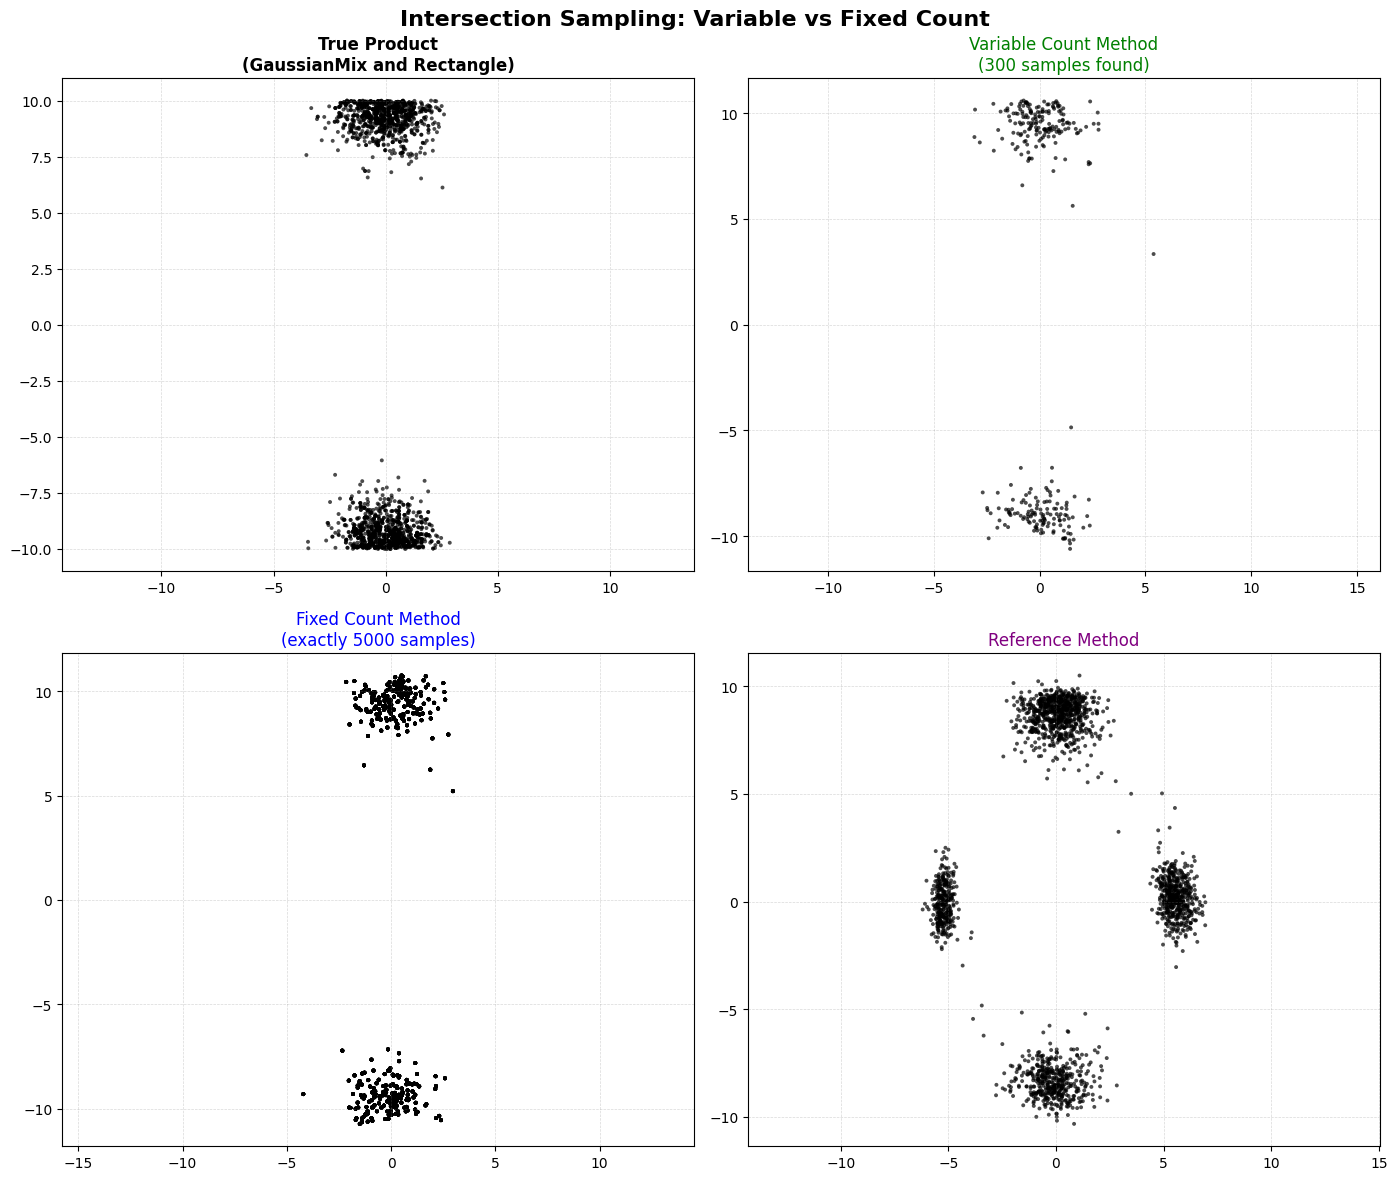

In [16]:
# Compare both intersection sampling methods
print("=== Comparing Both Intersection Sampling Methods ===")

# Method 1: New method - variable output count
variable_samples = IntersectionSampling(
    models=[model1, model2], 
    n_samples_per_model=50000, 
    path=gaussian_path, 
    device="cuda",
    ball_radius=0.8)

# Method 2: Original method - fixed output count with oversampling
fixed_samples = OversamplingIntersectionSampling(
    models=[model1, model2], 
    n=5000,  # Desired output count
    oversample_factor=3.0,  # Generate 3x samples then filter
    path=gaussian_path, 
    device="cuda",
    ball_radius=0.8)

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Row 1: True product vs variable count method
plot_samples(true_samples, ax=axes[0,0], contour=False, scatter=True)
axes[0,0].set_title("True Product\n(GaussianMix and Rectangle)", fontsize=12, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

plot_samples(variable_samples, ax=axes[0,1], contour=False, scatter=True)
axes[0,1].set_title(f"Variable Count Method\n({variable_samples.shape[0]} samples found)", fontsize=12, color='green')
axes[0,1].grid(True, alpha=0.3)

# Row 2: Fixed count method vs working method
plot_samples(fixed_samples, ax=axes[1,0], contour=False, scatter=True)
axes[1,0].set_title(f"Fixed Count Method\n(exactly {fixed_samples.shape[0]} samples)", fontsize=12, color='blue')
axes[1,0].grid(True, alpha=0.3)

plot_samples(working_samples, ax=axes[1,1], contour=False, scatter=True)
axes[1,1].set_title("Reference Method", fontsize=12, color='purple')
axes[1,1].grid(True, alpha=0.3)

plt.suptitle("Intersection Sampling: Variable vs Fixed Count", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()